<a href="https://colab.research.google.com/github/krishtech1602/task7/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer



In [27]:
data = load_breast_cancer()
X, y = data.data, data.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [29]:
scaler_main = StandardScaler()
X_train = scaler_main.fit_transform(X_train)
X_test = scaler_main.transform(X_test)

# ✅ Debug: Check types after scaling
print("Type of X_train:", type(X_train))
print("Type of X_test:", type(X_test))
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Type of X_train: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Shape of X_train: (398, 30)
Shape of X_test: (171, 30)


In [30]:
svm_linear = SVC(kernel="linear", C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [31]:
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [32]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.01, 0.1, 1, 10],
    "kernel": ["rbf"]
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("\nBest Parameters (RBF):", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters (RBF): {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.9748734177215189


In [33]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_best = grid.best_estimator_.predict(X_test)

In [34]:
print("\nLinear SVM Report:\n", classification_report(y_test, y_pred_linear))
print("\nRBF SVM Report:\n", classification_report(y_test, y_pred_rbf))
print("\nBest Tuned RBF SVM Report:\n", classification_report(y_test, y_pred_best))


Linear SVM Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


RBF SVM Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Best Tuned RBF SVM Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.99      0.98      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weight

In [35]:
cv_scores = cross_val_score(svm_rbf, X, y, cv=5)
print("\nCross-validation accuracy (RBF):", np.mean(cv_scores))


Cross-validation accuracy (RBF): 0.9121720229777983


In [36]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="coolwarm")
    plt.title(title)
    plt.show()

In [37]:
X_vis = X[:, :2]
scaler_vis = StandardScaler()
X_vis = scaler_vis.fit_transform(X_vis)


In [38]:
svm_linear_vis = SVC(kernel="linear", C=1.0).fit(X_vis, y)
svm_rbf_vis = SVC(kernel="rbf", gamma=0.7).fit(X_vis, y)

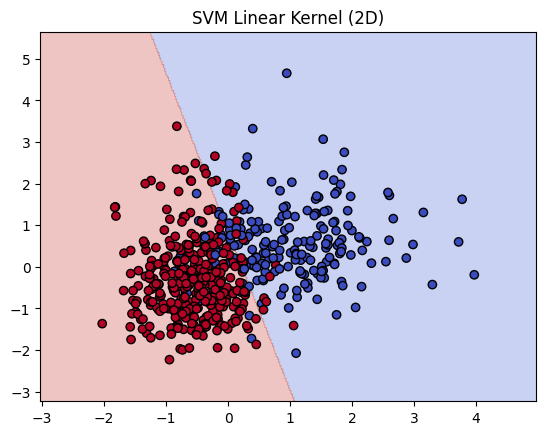

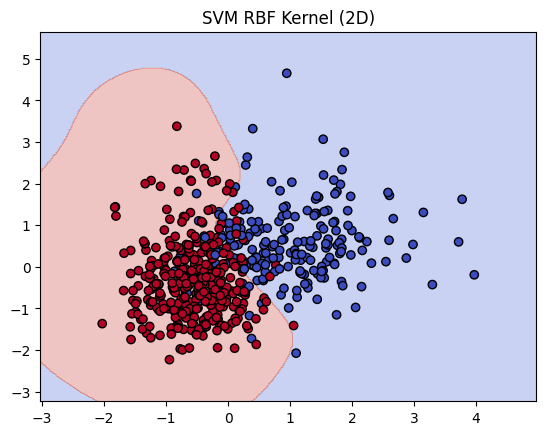

In [39]:
plot_decision_boundary(svm_linear_vis, X_vis, y, "SVM Linear Kernel (2D)")
plot_decision_boundary(svm_rbf_vis, X_vis, y, "SVM RBF Kernel (2D)")